# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn's random forest.

First, we will fit the penguins regression dataset.

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

data_train

,Flipper Length (mm)
306,187.0
101,183.0
153,210.0
341,198.0
81,187.0
...,...
323,198.0
192,225.0
117,189.0
47,190.0


<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and check the
generalization performance on the testing set in terms of mean absolute error.

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

random_forest = RandomForestRegressor(n_estimators=3, n_jobs=2, random_state=0)

random_forest.fit(data_train, target_train)

predicted = random_forest.predict(data_test)

test_score = mean_absolute_error(target_test, predicted)

test_score

345.3494091107379

We now aim to plot the predictions from the individual trees in the forest.
For that purpose you have to create first a new dataset containing evenly
spaced values for the flipper length over the interval between 170 mm and 230
mm.

In [92]:
import numpy as np

new_data = pd.DataFrame(np.arange(170, 230, 1.0), columns=data.columns)


The trees contained in the forest that you created can be accessed with the
attribute `estimators_`. Use them to predict the body mass corresponding to
the values in this newly created dataset. Similarly find the predictions of
the random forest in this dataset.

In [95]:
# vars(random_forest)
predictions_trees = []
for est in random_forest.estimators_:
    predictions_trees.append(est.predict(new_data[[feature_name]])) #to avoid the error, set .to_numpy()
    
random_new_predictions = random_forest.predict(new_data)

C:\Users\awben\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\awben\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\awben\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


Now make a plot that displays:
- the whole `data` using a scatter plot;
- the decision of each individual tree;
- the decision of the random forest.

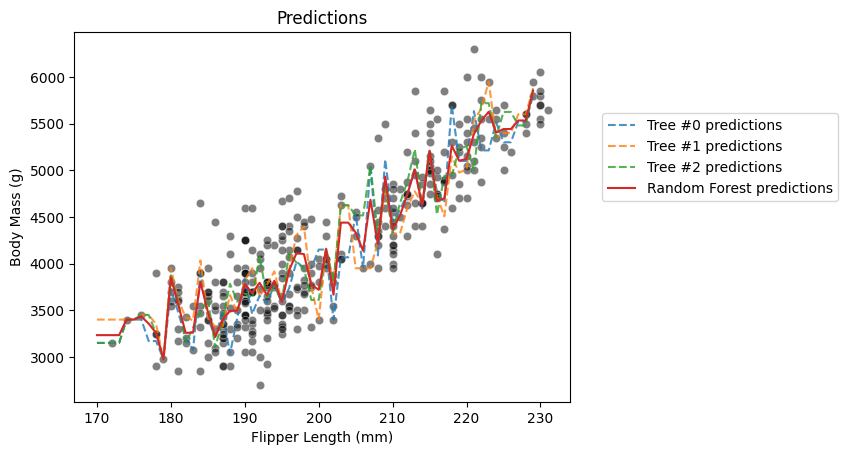

In [98]:

import seaborn as sns 
import matplotlib.pyplot as plt

sns.scatterplot(
    penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)

for tree_idx, tree_prediction in enumerate(predictions_trees):
    plt.plot(
        new_data[[feature_name]],
        tree_prediction,
        linestyle="--",
        alpha=0.8,
        label=f"Tree #{tree_idx} predictions",
    )

plt.plot(
    new_data[[feature_name]],
    random_new_predictions,
    label="Random Forest predictions",
    linestyle="-",
)

plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Predictions")